In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read the dataset
data_BM = pd.read_csv('C:/Users/DELL/Data_Visualization_with_Matplotlib/bigmart_data.csv')
#drop the null values
data_BM = data_BM.dropna(how="any")
#view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [4]:
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:10]
price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

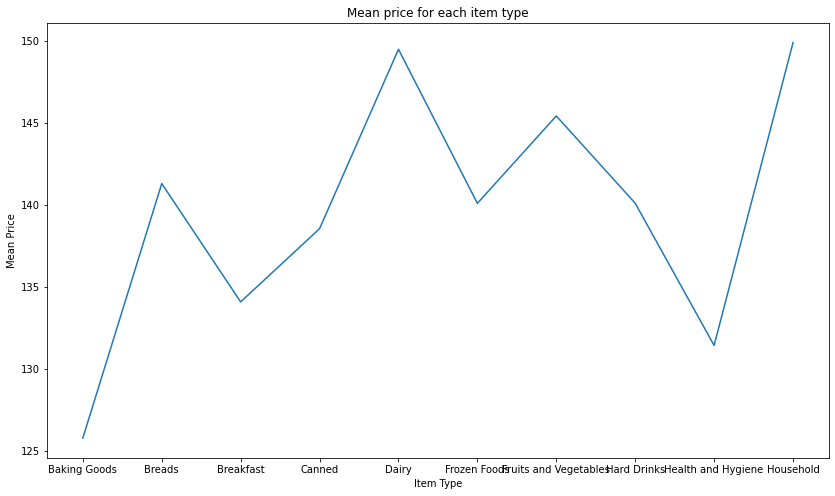

In [5]:
 # mean price based on item type
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:10]

x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

# set figure size
plt.figure(figsize=(14, 8))

# set title
plt.title('Mean price for each item type')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Mean Price')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y)

<BarContainer object of 3 artists>

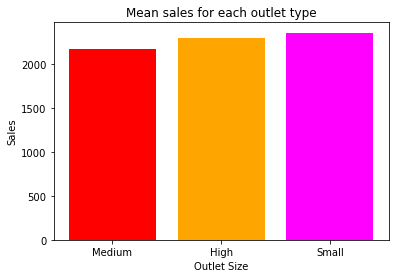

In [6]:
# sales by outlet size
sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet type')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['red', 'orange', 'magenta'])

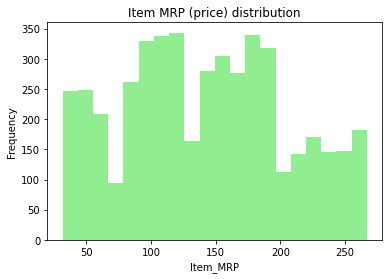

In [11]:
# title
plt.title('Item MRP (price) distribution')

# xlabel
plt.xlabel('Item_MRP')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(data_BM['Item_MRP'], bins=20, color='lightgreen');

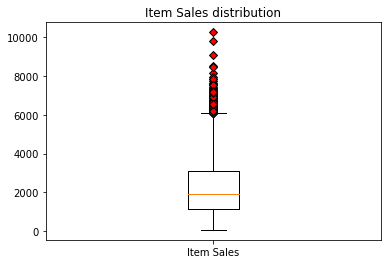

In [12]:
data = data_BM[['Item_Outlet_Sales']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data.values, labels=['Item Sales'], flierprops=red_diamond);

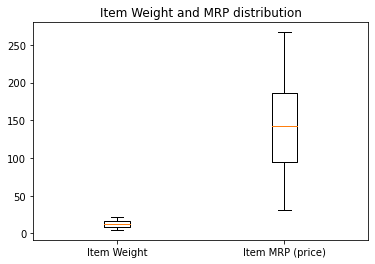

In [14]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# generate subplots
fig, ax = plt.subplots()

# set title
plt.title('Item Weight and MRP distribution')

# make the boxplot
plt.boxplot(data.values, labels=['Item Weight', 'Item MRP (price)'], flierprops=red_diamond);

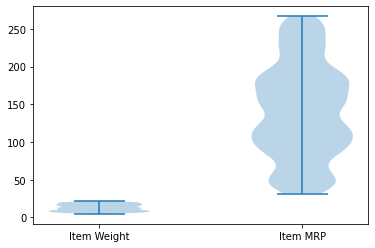

In [15]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# generate subplots
fig, ax = plt.subplots()

# add labels to x axis
plt.xticks(ticks=[1,2], labels=['Item Weight', 'Item MRP'])

# make the violinplot
plt.violinplot(data.values);

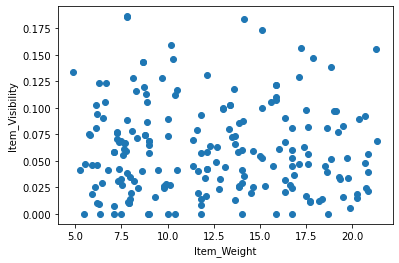

In [16]:
# set label of axes 
plt.xlabel('Item_Weight')
plt.ylabel('Item_Visibility')

# plot
plt.scatter(data_BM["Item_Weight"][:200], data_BM["Item_Visibility"][:200])

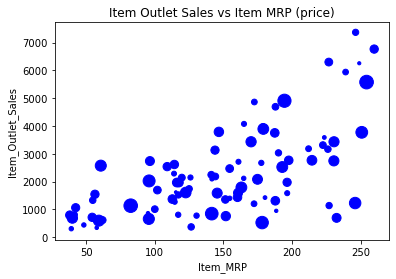

In [20]:
# set label of axes 
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

# set title
plt.title('Item Outlet Sales vs Item MRP (price)')

# plot
plt.scatter(data_BM["Item_MRP"][:100], data_BM["Item_Outlet_Sales"][:100], s=data_BM["Item_Visibility"][:100]*1000, c='blue')